In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Load BLAST output file
blast_df = pd.read_csv('combined_amr_gene_hits.txt', delimiter='\t', header=None)

# Assign column names 
blast_df.columns = ['ID', 'sseqid', 'pident', 'alignment_length', 'mismatches', 'gap_opens', 'q_start', 'q_end', 's_start', 's_end', 'evalue', 'bit_score']

blast_df['ID'].unique()
blast_df.head()

,ID,sseqid,pident,alignment_length,mismatches,gap_opens,q_start,q_end,s_start,s_end,evalue,bit_score
0,U00096.3,gb|U00096.1|+|2484373-2487967|ARO:3000833|evgS,100.000,3594,0,0,2484374,2487967,1,3594,0.0,6637
1,U00096.3,gb|U00096.3|-|481253-484403|ARO:3000216|acrB,100.000,3150,0,0,481254,484403,3150,1,0.0,5818
2,U00096.3,gb|U00096.3|-|481253-484403|ARO:3000216|acrB,73.758,3140,724,89,3415042,3418129,9,3100,0.0,1142
3,U00096.3,gb|U00096.1|+|2155262-2158385|ARO:3000793|mdtB,100.000,3123,0,0,2155263,2158385,1,3123,0.0,5768
4,U00096.3,gb|AP009048.1|+|2586250-2589364|ARO:3000491|acrD,100.000,3114,0,0,2587595,2590708,1,3114,0.0,5751


In [10]:
# Filter for genes with >/= 90 percentage identity
filtered_df = blast_df[blast_df['pident'] >= 90].copy()
print(f"Filtered Results: {filtered_df.shape[0]} rows")

Filtered Results: 462 rows


In [11]:
# Extract ARO_Index and Gene name from sseqid
filtered_df['ARO_Index'] = filtered_df['sseqid'].str.extract(r'ARO:(\d+)')
filtered_df['Gene'] = filtered_df['sseqid'].str.extract(r'\|ARO:\d+\|([^|]+)')

filtered_df.head()
# Keep relevant columnsf
processed_df = filtered_df[['ID', 'ARO_Index', 'Gene', 'pident', 'alignment_length', 'mismatches', 'gap_opens', 'q_start', 'q_end', 's_start', 's_end', 'evalue', 'bit_score']]

# Save filtered and processd data to a new file
processed_df.to_csv('processed_amr_gene_hits.tsv', sep='\t', index=False)

## Visualizations

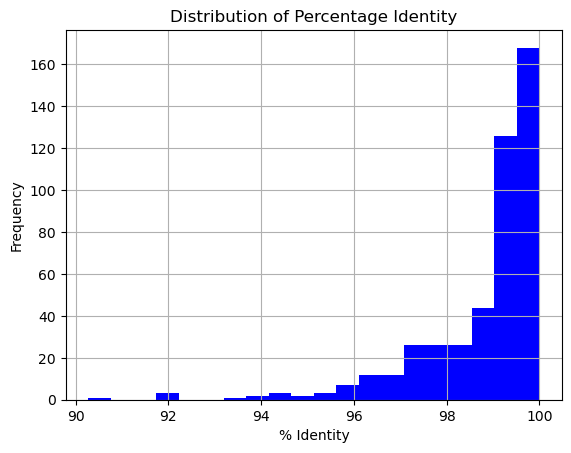

In [12]:
# Visualize distribution of percentage identity
processed_df['pident'].hist(bins=20, color='blue')
plt.title('Distribution of Percentage Identity')
plt.xlabel('% Identity')
plt.ylabel('Frequency')
plt.show()


# Classifying AMR Genes

In [13]:
processed_df.head()

,ID,ARO_Index,Gene,pident,alignment_length,mismatches,gap_opens,q_start,q_end,s_start,s_end,evalue,bit_score
0,U00096.3,3000833,evgS,100.0,3594,0,0,2484374,2487967,1,3594,0.0,6637
1,U00096.3,3000216,acrB,100.0,3150,0,0,481254,484403,3150,1,0.0,5818
3,U00096.3,3000793,mdtB,100.0,3123,0,0,2155263,2158385,1,3123,0.0,5768
4,U00096.3,3000491,acrD,100.0,3114,0,0,2587595,2590708,1,3114,0.0,5751
5,U00096.3,3000796,mdtF,100.0,3114,0,0,3660414,3663527,1,3114,0.0,5751


In [ ]:
# Load reference table
reference_data = pd.read_excel('amr_reference_table.xlsx')

reference_df = pd.DataFrame(reference_data)

# Split Gene Families and VAriants into lists for easier matching
reference_df['Gene Families'] = reference_df['Gene Families'].str.split(', ')
reference_df['Variants'] = reference_df['Variants'].str.split(', ')

,Resistance Class,Gene Families,Variants
0,Beta-lactam Resistance,"[ampC, TEM, CMY, OXA, CARB, MIR, ACT, NDM, VIM...","[TEM-1, CMY-12, OXA-48, Ecol_ampC_BLA, CARB-58..."
1,Aminoglycoside Resistance,"[AAC, APH,aadA]","[AAC(3)-Ib, APH(3'')-Ib, AADa1]"
2,Fluoroquinolone Resistance,"[acr, qnr]","[acrA, qnrA]"
3,Tetracycline Resistance,[tet],"[tet(A), tet(B)]"
4,Sulfonamide Resistance,[sul],"[sul1, sul2]"
5,Polymyxin Resistance,[mcr],"[MCR-1, MCR-2]"
6,Efflux Pump Resistance,"[mex, emr]","[mexB, emrA]"


In [ ]:
# Function to classify genes
def classify_gene(gene):
    for _, row in reference_df.iterrows():
        if gene in row['Gene Families'] or gene in row['Variants']:
            return row['Resistance Class'], ', '.join(row['Gene Families']), ', '.join(row['Variants'])
    return None, None, None

In [ ]:
#
